In [1]:
] status

Project ClusterEnumeration v0.1.0
Status `~/home/juliaCodes/ClusterEnumeration.jl/Project.toml`
  [861a8166] Combinatorics v1.0.2
⌃ [295af30f] Revise v3.4.0
  [6fa23216] Spacey v0.4.0
  [37e2e46d] LinearAlgebra
  [de0858da] Printf
  [9a3f8284] Random
  [8dfed614] Test
Info Packages marked with ⌃ have new versions available


In [2]:
using Revise
 

[ Info: Precompiling ClusterEnumeration [85edfcc1-586e-47ac-903c-ed0e8dcda8ac]


In [3]:
?ClusterEnumeration

In [324]:
using Random
using Plots
using DelimitedFiles
using LinearAlgebra

default(ms=2,msw=0,legend=:none,st=:scatter,guidefont=16,tickfont=12,legendfont=12)

cd("/Users/glh43/home/juliaCodes/ClusterEnumeration.jl/data/")

en = readdlm("energiesPerAtom.fcc.upto10")
m = readdlm("pimat.2-7b_li1791")
_,_,nV,dists,_ = read_clusters_from_file("clusters.2-7b_li1791") 
colors = replace(nV, 1=>:red, 2=>:orange,3=>:green,4=>:magenta,5=>:blue,6=>:red,7=>:purple)
pushfirst!(nV,0)
pushfirst!(colors,:black)
pushfirst!(dists,0)
J = m\en;

jp1 = Plot{Plots.GRBackend() n=1}
jp2 = Plot{Plots.GRBackend() n=1}


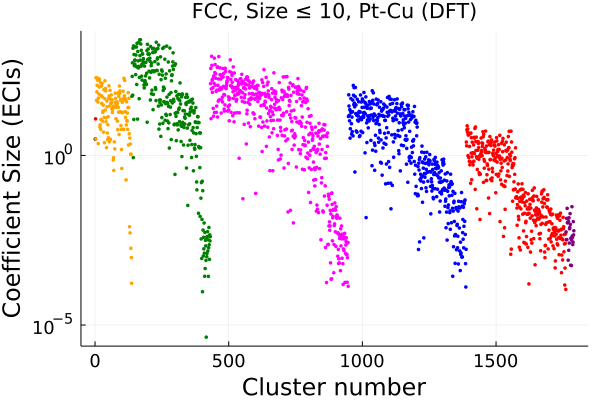

In [325]:
jp1 = plot(J,yaxis=:identity,color=colors,xlabel="Cluster number",ylabel="Coefficient Size (ECIs)",
title="FCC, Size ≤ 10, Pt-Cu (DFT)")
png(jp1,"Js_PtCu_identity.png")
@show jp1
jp2 = plot(abs.(J),color=colors,xlabel="Cluster number",ylabel="Coefficient Size (ECIs)",
title="FCC, Size ≤ 10, Pt-Cu (DFT)",yaxis=:log)
png(jp2,"Js_PtCu_logy.png")
@show jp2

jp1 = Plot{Plots.GRBackend() n=1}


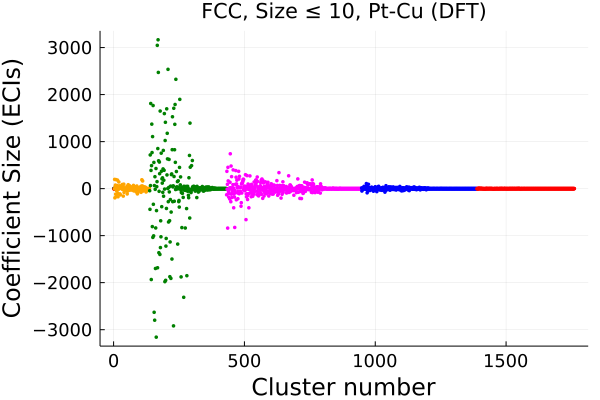

In [9]:
@show jp1

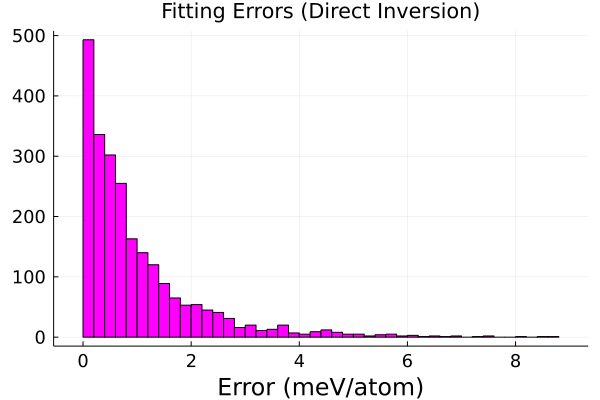

In [326]:
histogram(abs.(m*J-en).*1000,color=:magenta,title="Fitting Errors (Direct Inversion)",xlabel="Error (meV/atom)")

In [327]:
findmax(abs.(m*J-en)) # Index of the structure with the largest error

(0.008623595336574752, CartesianIndex(2313, 1))

In [328]:
sizes = 1:1:400
#using ProgressBars
errFit, errVal, ranks = sweep_model_sizes(m,en,20,sizes,200)

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400


([0.3548827265447359, 0.10451081536894777, 0.03072846432739168, 0.02844773467787216, 0.027083879071662053, 0.025706278455032462, 0.023487248431376218, 0.022786448717097094, 0.020075517532173227, 0.021563092793713108  …  8.630815672014054e-5, 0.00017423394205863334, 0.00015297429187228755, 0.00011241064303286772, 0.0003330877070253068, 0.00019124451959862197, 0.0001351869877279105, 0.00012097316180255308, 0.00021313027685843748, 8.060356647920454e-5], [0.3521772542720133, 0.10677901012911376, 0.031178643551487428, 0.02933040835919736, 0.027521530953471467, 0.026784876210002563, 0.024237001716734072, 0.02376846609815447, 0.022321064971151702, 0.022032699756320995  …  0.09763044766109782, 0.1509515500438773, 0.1986094562875413, 0.1902904847900119, 0.1382940702815033, 0.2458854711822093, 0.1132450127178158, 0.20463525801336843, 0.10197786282437471, 0.09574010820044301], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  199.75, 199.2, 199.35, 199.55, 198.95, 199.5, 199.35, 199.65, 199.

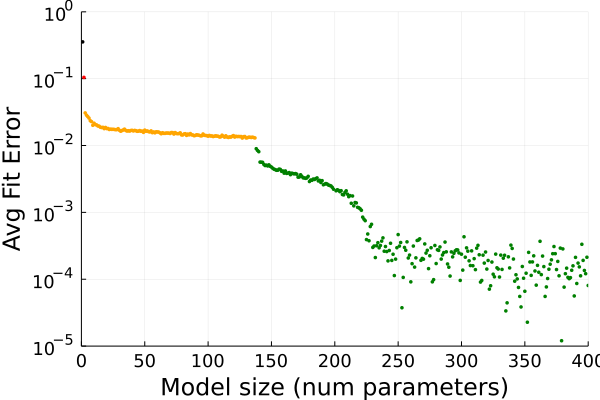

In [329]:
plot(sizes,errFit,yaxis=:log,xlabel="Model size (num parameters)",ylabel="Avg Fit Error",
    color=colors[sizes],yrange=(1e-5,1e-0),xticks = 0:50:1100,xrange=(0,sizes[end]))


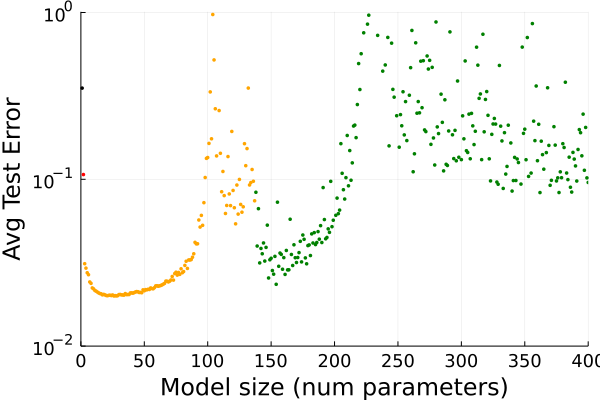

In [330]:
plot(sizes,errVal,yaxis=:log,xlabel="Model size (num parameters)",ylabel="Avg Test Error",
    color=colors[sizes],yrange=(1e-2,1e-2),xticks = 0:50:1100,xrange=(0,sizes[end]))

In [28]:
n = m[:,[1:43; 137:146; 431:450;947:960]]
J = m\en
norm(m*J-en)/sqrt(size(m,1))

0.0018226480052691604

In [24]:
findfirst(x-> x==5, nV)

947

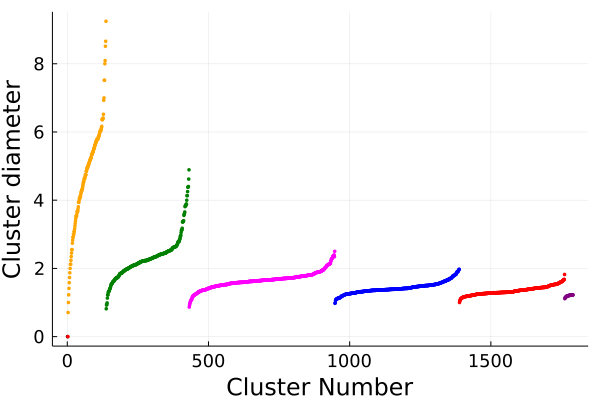

In [331]:
plot(dists,color=colors,ylabel="Cluster diameter",xlabel="Cluster Number")

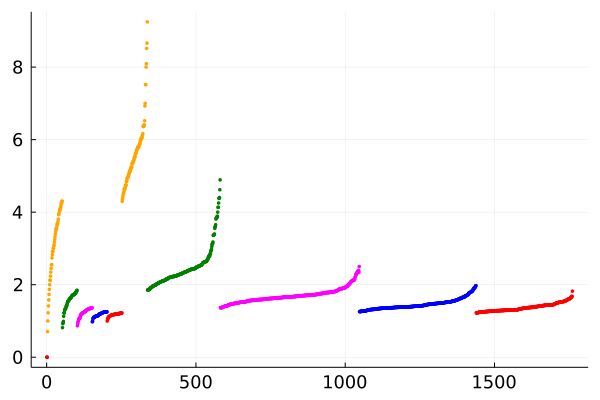

In [78]:
cut = 50
trythese=pushfirst!(vcat([findall(x->x==i,nV)[1:cut] for i in 2:6]...),1,2)
leftout = [i for i in 1:1761 if i ∉ trythese]
neworder = [trythese;leftout]
n = m[:,neworder]
c2 = colors[neworder]
plot(dists[neworder],color=colors[neworder])

In [71]:
sizes = 1:1:400
#using ProgressBars
errFit, errVal, ranks = sweep_model_sizes(n,en,20,sizes,200)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


([0.3445123488362067, 0.10580170488666889, 0.030299599099845236, 0.02854247118260328, 0.026658915627142194, 0.026481451196608552, 0.02335976400856633, 0.022204236498337287, 0.021245340426608784, 0.02042448215820631  …  1.9274137284313023e-5, 5.970832485558863e-15, 6.350888498399037e-15, 6.24552055941782e-5, 2.7291834507769677e-5, 7.700503340292959e-6, 6.8520176068828304e-15, 6.622474207326016e-15, 1.0074086245369923e-5, 6.507452772307692e-6], [0.35274755469112223, 0.1070528095255225, 0.031042123522320848, 0.02931414721744214, 0.027727633588271756, 0.026742971983673806, 0.024276612987908786, 0.023731328715610615, 0.022112446900633752, 0.022105727738164594  …  0.12067474759360412, 0.1151741215321445, 0.12357134836292032, 0.11806570148136383, 0.11870964667119747, 0.11677324393280138, 0.12057056610286077, 0.11983368641285978, 0.12254593170816463, 0.11806188696778441], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  199.8, 200.0, 200.0, 199.65, 199.8, 199.75, 200.0, 200.0, 199.85, 19

In [67]:
neworder

1761-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 1750
 1751
 1752
 1753
 1754
 1755
 1756
 1757
 1758
 1759
 1760
 1761

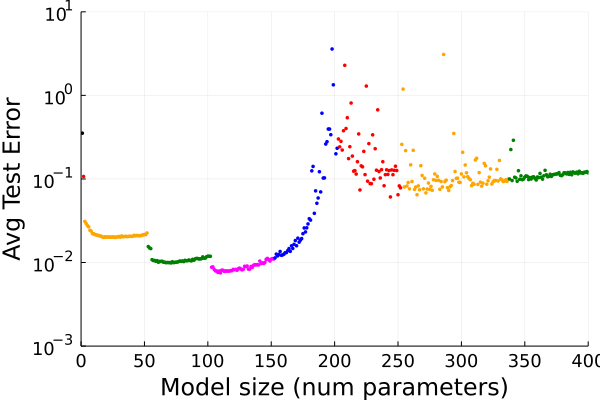

In [75]:
plot(sizes,errVal,yaxis=:log,xlabel="Model size (num parameters)",ylabel="Avg Test Error",
    color=colors[neworder][sizes],yrange=(1e-3,1e1),xticks = 0:50:1100,xrange=(0,sizes[end]))

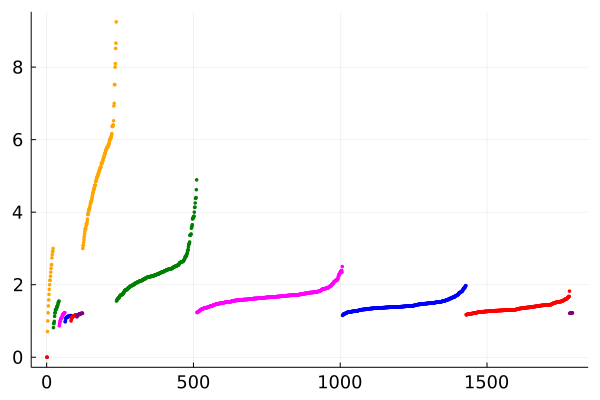

In [334]:
cut = 20
trythese=pushfirst!(vcat([findall(x->x==i,nV)[1:cut] for i in 2:7]...),1,2)
leftout = [i for i in 1:1791 if i ∉ trythese]
neworder = [trythese;leftout]
n = m[:,neworder]
c2 = colors[neworder]
plot(dists[neworder],color=colors[neworder])

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400


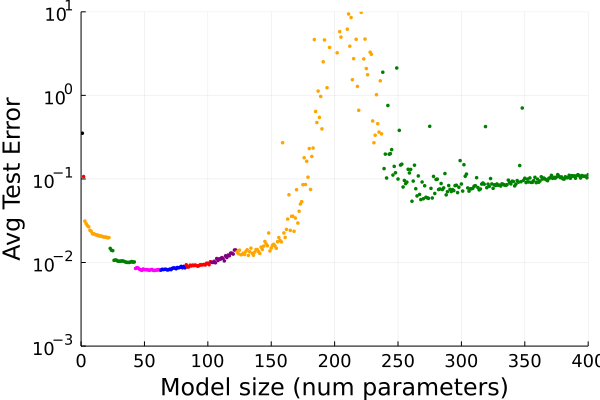

In [336]:
sizes = 1:1:400
#using ProgressBars
errFit, errVal, ranks = sweep_model_sizes(n,en,20,sizes,200)
plot(sizes,errVal,yaxis=:log,xlabel="Model size (num parameters)",ylabel="Avg Test Error",
    color=c2[sizes],yrange=(1e-3,1e1),xticks = 0:50:1100,xrange=(0,sizes[end]))

[findfirst((i->begin
            #= In[17]:1 =#
            i == j
        end), nV) for j = 2:6] = [3, 138, 432, 948, 1389]
25
50
75
100
125
150


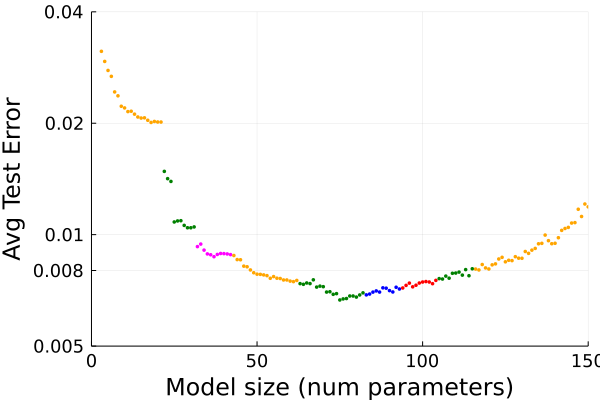

In [17]:
@show [findfirst(i->i==j,nV) for j ∈ 2:6]
sizes = 1:1:150
yt = [5e-3,8e-3,1e-2,2e-2,4e-2]
front = [1:20;137:147;432:442;21:40;159:178;948:958;1389:1399;148:158]
rest = [i for i in 1:1761 if i ∉ front]
neworder = [front;rest]
n = m[:,neworder]
errFit, errVal, ranks = sweep_model_sizes(n,en,40,sizes,200);
plot(sizes,errVal,yaxis=:log,xlabel="Model size (num parameters)",ylabel="Avg Test Error",
    color=colors[neworder][sizes],yrange=(yt[1],yt[end]),xticks = 0:50:1100,xrange=(0,sizes[end]),
    yticks=(yt,yt))

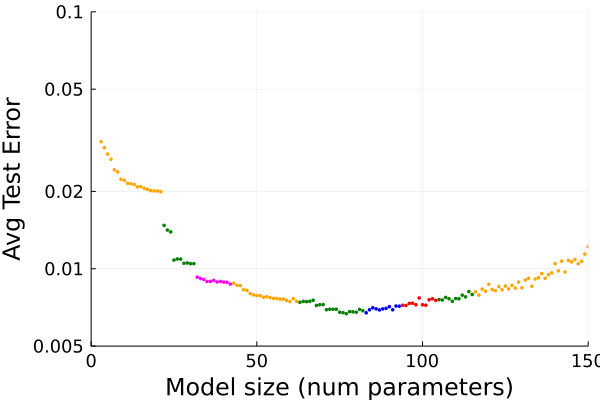

In [14]:
plot(sizes,errVal,yaxis=:log,xlabel="Model size (num parameters)",ylabel="Avg Test Error",
    color=colors[neworder][sizes],yrange=(5e-3,1e-1),xticks = 0:50:1100,xrange=(0,sizes[end]),yticks=([1e-3,5e-3,1e-2,2e-2,5e-2,1e-1],[1e-3,5e-3,1e-2,2e-2,5e-2,1e-1]))

In [21]:
sizes = 1:1:2
yt = [5e-3,8e-3,1e-2,2e-2,4e-2]
front = [1:20;137:147;432:442;21:40;159:178;948:958;1389:1399;148:158]
rest = [i for i in 1:1761 if i ∉ front]
neworder = [front;rest]
n = m[:,neworder]
errFit, errVal, ranks = sweep_model_sizes(n,en,40,sizes,200);

In [22]:
errFit, errVal

([0.3519479088044005, 0.10767732152007596], [0.35218942009267795, 0.1065309278319024])

In [337]:
Nits = 50
nFit = 200
clFinal = [1;2;3]
fitE=[];testE=[];ranks=[]
totry = [i for i ∈ 1:size(m,2) if i ∉ clFinal]
for trial in totry
    cl = [clFinal; trial]
    avgFitE = 0
    avgValE = 0
    avgRank = 0
    for it ∈ 1:Nits
        t = randperm(size(m,1))
        fitIdx = t[1:nFit]
        valIdx = t[nFit+1:end]
        J = m[fitIdx,cl]\en[fitIdx]
        avgFitE += norm(m[fitIdx,cl]*J-en[fitIdx])/sqrt(nFit)
        avgRank += rank(m[fitIdx,cl])
        avgValE += norm(m[valIdx,cl]*J-en[valIdx])/sqrt(size(m,1)-nFit)
    end
    push!(fitE,avgFitE /= Nits)
    push!(testE,avgValE /= Nits)
    push!(ranks,avgRank /= Nits)
end

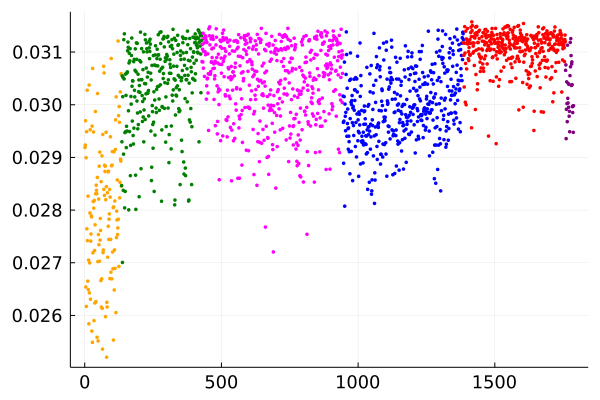

In [338]:
plot(testE,color=colors[4:end])

In [60]:
Nits = 20
nFit = 200
clFinal = [1;2;3;83]
fitE=[];testE=[];ranks=[]
totry = [i for i ∈ 1:1761 if i ∉ clFinal]
for trial in totry
    cl = [clFinal; trial]
    avgFitE = 0
    avgValE = 0
    avgRank = 0
    for it ∈ 1:Nits
        t = randperm(size(m,1))
        fitIdx = t[1:nFit]
        valIdx = t[nFit+1:end]
        J = m[fitIdx,cl]\en[fitIdx]
        avgFitE += norm(m[fitIdx,cl]*J-en[fitIdx])/sqrt(nFit)
        avgRank += rank(m[fitIdx,cl])
        avgValE += norm(m[valIdx,cl]*J-en[valIdx])/sqrt(size(m,1)-nFit)
    end
    push!(fitE,avgFitE /= Nits)
    push!(testE,avgValE /= Nits)
    push!(ranks,avgRank /= Nits)
end

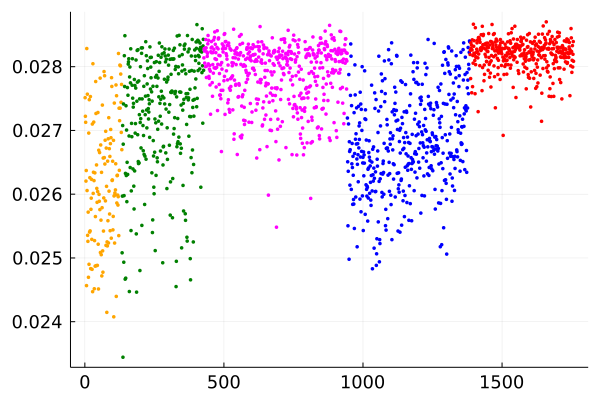

In [61]:
plot(testE,color=colors[5:end])

In [86]:
function try_all_remaining_clusters(m,en,clFinal,Nits)
fitE=[];testE=[];ranks=[]
totry = [i for i ∈ 1:1761 if i ∉ clFinal]
    for trial in totry
        cl = [clFinal; trial]
        avgFitE = 0
        avgValE = 0
        avgRank = 0
        for it ∈ 1:Nits
            t = randperm(size(m,1))
            fitIdx = t[1:nFit]
            valIdx = t[nFit+1:end]
            J = m[fitIdx,cl]\en[fitIdx]
            avgFitE += norm(m[fitIdx,cl]*J-en[fitIdx])/sqrt(nFit)
            avgRank += rank(m[fitIdx,cl])
            avgValE += norm(m[valIdx,cl]*J-en[valIdx])/sqrt(size(m,1)-nFit)
        end
        push!(fitE,avgFitE /= Nits)
        push!(testE,avgValE /= Nits)
        push!(ranks,avgRank /= Nits)
    end 
return fitE, testE, ranks
end

try_all_remaining_clusters (generic function with 2 methods)

In [291]:
E = readdlm("Pt-Cu_TestError.data")[:,1]
UsedCl = Int.(readdlm("Pt-Cu_TestError.data")[:,2])
#UsedCl = [1, 2, 3, 83, 141, 59, 79, 582, 52, 209, 78, 432, 1149, 24, 522, 14, 50, 98, 150, 28, 27, 102, 16, 164, 1663, 30, 1294, 337, 1689, 71, 93, 378, 67, 434, 247, 1621, 433, 843, 955, 1317, 23, 1523, 1315, 678, 49, 46, 456, 1620, 1472, 697, 1180, 1009, 1675, 29, 138, 53, 265, 554, 1267, 951, 1647, 1136, 182, 62, 425, 1323, 1530, 1228, 750, 618, 36, 580, 68, 1245, 1243, 1082, 1745, 1007, 43, 528, 383, 1285, 1123, 631, 831, 340, 1668, 838, 201, 1422, 971, 1477, 1652, 677, 589, 982, 949, 1691, 458]
RemCl = [i for i ∈ 1:1761 if i ∉ UsedCl]
#E = [0.3526, 0.1067, 0.0311, 0.0252, 0.01966, 0.01685, 0.01506, 0.01352, 0.01266, 0.01186, 0.01114, 0.01057, 0.01003, 0.00963, 0.00921, 0.00878, 0.00836, 0.00821, 0.00805, 0.00786, 0.00775, 0.0076, 0.00747, 0.00731, 0.00717, 0.00709, 0.00703, 0.00695, 0.00688, 0.00679, 0.00673, 0.00666, 0.00661, 0.00648, 0.00636, 0.00635, 0.00632, 0.00627, 0.00627, 0.00624, 0.00625, 0.00622, 0.00619, 0.00618, 0.00611, 0.0061, 0.00606, 0.00606, 0.00601, 0.00601, 0.00605, 0.00607, 0.00604, 0.00609, 0.00603, 0.00602, 0.00599, 0.0059, 0.00593, 0.00596, 0.00595, 0.00595, 0.00595, 0.00599, 0.00598, 0.00598, 0.006, 0.006, 0.00601, 0.00605, 0.00603, 0.006, 0.00595, 0.00594, 0.00596, 0.00601, 0.00605, 0.00604, 0.00609, 0.00606, 0.00607, 0.00605, 0.00605, 0.00604, 0.00605, 0.00607, 0.00606, 0.00606, 0.00611, 0.00613, 0.00615, 0.00617, 0.00616, 0.00622, 0.00623, 0.00625, 0.00624, 0.00623, 0.00632]
nTerms = length(UsedCl)
for i = nTerms:nTerms+100
    mod(i,1)==0 ? println("Iteration: ",i) : true 
   @time _, testE, _ = try_all_remaining_clusters(m,en,UsedCl,20)
    (minE, newCl) = findmin(testE)
    push!(E,minE)
    push!(UsedCl,RemCl[newCl])
    println("Added cluster: ",RemCl[newCl])
    deleteat!(RemCl,newCl)
end
#@show E
#@show UsedCl
writedlm("Pt-Cu_TestError.data", [E UsedCl])

Iteration: 215
248.674569 seconds (39.89 M allocations: 190.261 GiB, 7.28% gc time)
Added cluster: 966
Iteration: 216
255.659610 seconds (39.86 M allocations: 190.926 GiB, 7.22% gc time)
Added cluster: 1483
Iteration: 217
255.692329 seconds (39.84 M allocations: 191.587 GiB, 7.21% gc time)
Added cluster: 1141
Iteration: 218
260.511949 seconds (39.81 M allocations: 192.246 GiB, 6.97% gc time)
Added cluster: 1020
Iteration: 219
249.655079 seconds (39.79 M allocations: 192.931 GiB, 7.25% gc time)
Added cluster: 915
Iteration: 220
248.797363 seconds (39.76 M allocations: 193.592 GiB, 7.34% gc time)
Added cluster: 453
Iteration: 221
251.104257 seconds (39.74 M allocations: 194.248 GiB, 7.15% gc time)
Added cluster: 668
Iteration: 222
256.905682 seconds (39.71 M allocations: 194.904 GiB, 7.08% gc time)
Added cluster: 1120
Iteration: 223
256.057406 seconds (39.68 M allocations: 195.558 GiB, 7.27% gc time)
Added cluster: 468
Iteration: 224
256.897067 seconds (39.66 M allocations: 196.215 GiB, 

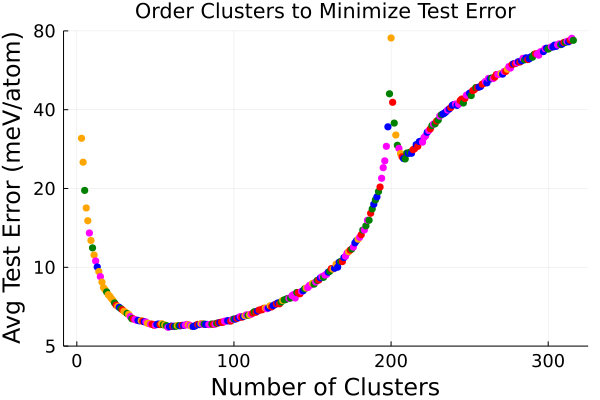

In [295]:
yti=[5,10,20,40,80]#,100,200,500]
plot(E*1000,yaxis=:log,yticks=(yti,yti),yrange=(yti[1],yti[end]),color=colors[UsedCl],ms=4,
ylabel="Avg Test Error (meV/atom)",xlabel="Number of Clusters",title="Order Clusters to Minimize Test Error")

In [202]:
@show round.(E,digits=5)
@show UsedCl

round.(E, digits = 5) = [0.3526, 0.1067, 0.0311, 0.0252, 0.01966, 0.01685, 0.01506, 0.01352, 0.01266, 0.01186, 0.01114, 0.01057, 0.01003, 0.00963, 0.00921, 0.00878, 0.00836, 0.00821, 0.00805, 0.00786, 0.00775, 0.0076, 0.00747, 0.00731, 0.00717, 0.00709, 0.00703, 0.00695, 0.00688, 0.00679, 0.00673, 0.00666, 0.00661, 0.00648, 0.00636, 0.00635, 0.00632, 0.00627, 0.00627, 0.00624, 0.00625, 0.00622, 0.00619, 0.00618, 0.00611, 0.0061, 0.00606, 0.00606, 0.00601, 0.00601, 0.00605, 0.00607, 0.00604, 0.00609, 0.00603, 0.00602, 0.00599, 0.0059, 0.00593, 0.00596, 0.00595, 0.00595, 0.00595, 0.00599, 0.00598, 0.00598, 0.006, 0.006, 0.00601, 0.00605, 0.00603, 0.006, 0.00595, 0.00594, 0.00596, 0.00601, 0.00605, 0.00604, 0.00609, 0.00606, 0.00607, 0.00605, 0.00605, 0.00604, 0.00605, 0.00607, 0.00606, 0.00606, 0.00611, 0.00613, 0.00615, 0.00617, 0.00616, 0.00622, 0.00623, 0.00625, 0.00624, 0.00623, 0.00632, 0.00634, 0.00634, 0.00638, 0.00642, 0.00648, 0.00644, 0.00648, 0.00653, 0.00658, 0.00656, 0.00658

200-element Vector{Int64}:
    1
    2
    3
   83
  141
   59
   79
  582
   52
  209
   78
  432
 1149
    ⋮
 1208
  366
 1018
  352
 1613
  694
  901
  599
  548
 1129
  375
    4

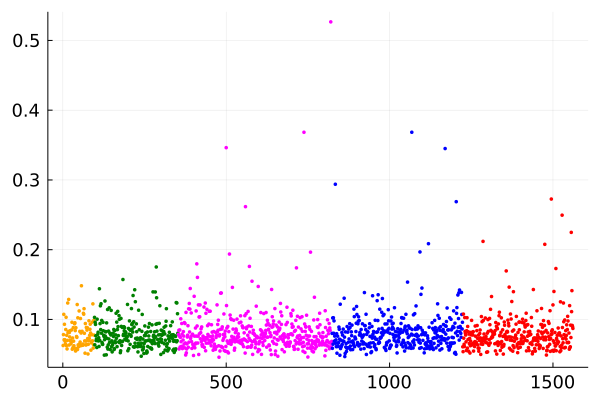

In [204]:
_, testE, _ = try_all_remaining_clusters(m,en,UsedCl,20)
idx = [i for i ∈ 1:1761 if i ∉ UsedCl]
plot(testE,color=colors[idx])

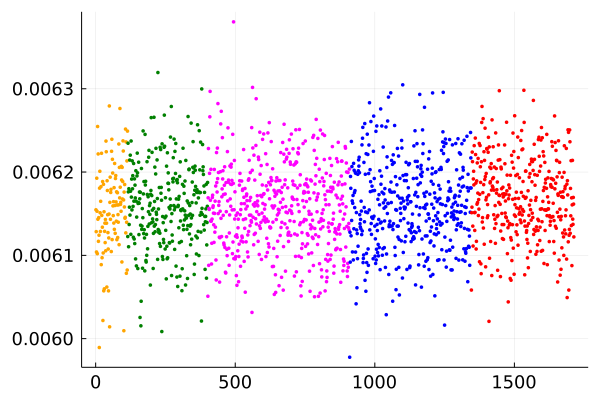

In [156]:
#_, testE, _ = try_all_remaining_clusters(m,en,UsedCl,20)
idx = [i for i ∈ 1:1761 if i ∉ UsedCl]
plot(testE,color=colors[idx])

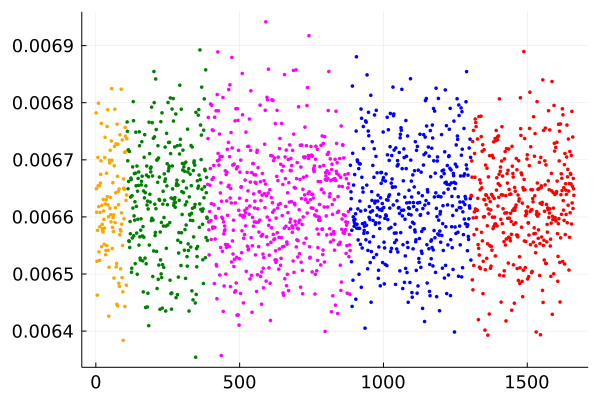

In [166]:
_, testE, _ = try_all_remaining_clusters(m,en,UsedCl,20)
idx = [i for i ∈ 1:1761 if i ∉ UsedCl]
plot(testE,color=colors[idx])

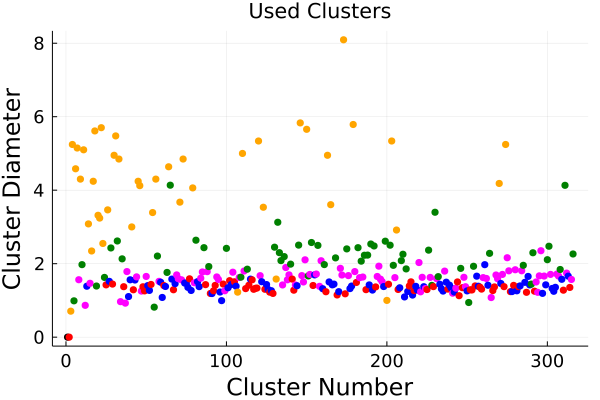

In [296]:
plot(dists[UsedCl],color=colors[UsedCl],ms=4,title="Used Clusters",ylabel="Cluster Diameter",xlabel="Cluster Number")

Run these next two cells with 2..6. It looks like the used clusters are not generally short or long, but have the same distribution as the cluster pool.

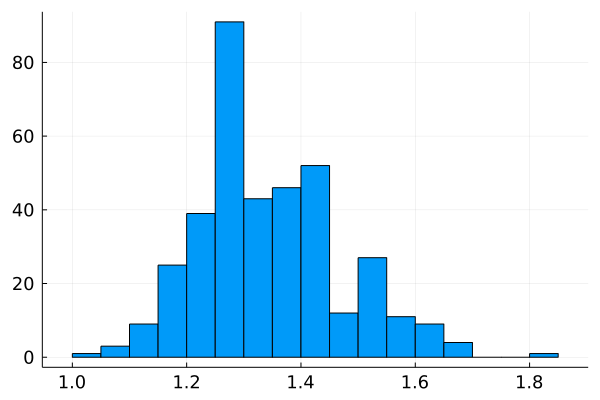

In [299]:
dists[findall(x->x==6,nV)]|>histogram

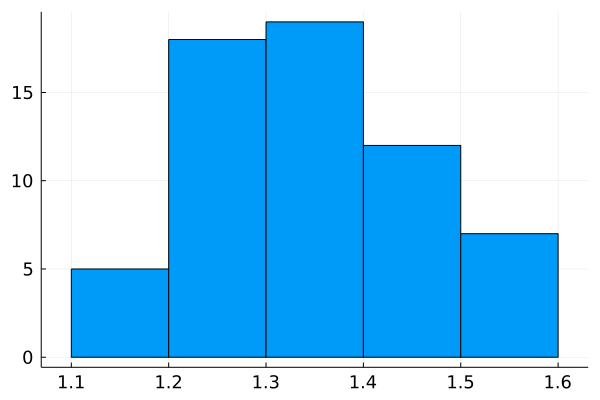

In [300]:
dists[[i for i in findall(x->x==6,nV) if i in UsedCl]]|>histogram

Now get the energies from the other two systems and fit them using this ordering of clusters

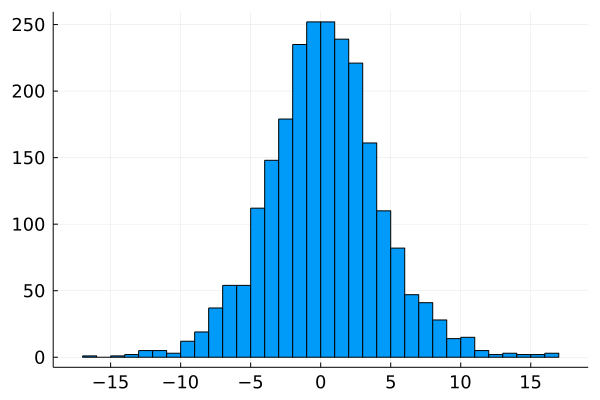

In [267]:
pp = randperm(1761)[1:1760]
m[:,UsedCl]*(m[pp,UsedCl]\en[pp])-en|>x->histogram(x*1000)

In [256]:
en

2346×1 Matrix{Float64}:
 -3.74600252
 -5.40619719
 -4.891801255
 -5.06965173
 -4.43639088
 -4.61703195
 -4.540426146666666
 -5.05049553
 -5.279535293333333
 -5.22379126
 -4.2410015925
 -4.3591473775
 -4.353315895
  ⋮
 -5.175317892000001
 -5.265757673
 -5.051453244999999
 -5.155364719
 -5.1140333579999995
 -5.245260641
 -5.307519255
 -5.364061565
 -5.220731703
 -5.327189949
 -5.395418486
 -5.427669807

In [314]:
heatmap(m[end:-1:1,:],aspect_ratio=1,dpi=100)